# Simple logistic regression

This notebook follows John H McDonald's [Handbook of Biological Statistics](http://www.biostathandbook.com/simplelogistic.html) chapter on simple logistic regression.

This notebook is provided with a CC-BY-SA license.

<a name='top'></a>
# Classificacion

En un problema de clasificación, necesitamos predecir la etiqueta de una muestra que es un valor discreto (clase).
Existen diferentes métodos para entrenar un modelo para predecir la clase de las muestras de datos.
En este cuaderno, aprenderemos cómo usar:

- Regresión logística
- Máquina de vectores de soporte (SVM)
- Método de bosque aleatorio
- Matriz de confusión

Este cuaderno cubrirá los siguientes temas:

- [1. Preparación de los datos](#preparation)
- [2. Regresión Logística](#logistic_regression)


Este cuaderno está creado para clasificar dígitos escritos a mano. Importemos los paquetes necesarios y el conjunto de datos.

## Regresion logistica
Imaginemos un caso de clasificacion en concreto, donde quiero predecir entre dos clases a partir de un dato de entrada: en este caso, solo tenemos dos opciones: el tumor puede ser maligno o puede ser beningo. 
Como podemos resolver este problema.Podriamos imaginar hacer una regresion lineal. Al fin y al cabo, por que no? 

<img src="./linear_para_clas.png" alt="linear para clas" width="400" height="300">

Elegimos un valor limite, a partir del cual decidimos si el tumor es maligno o no. 

 Sin embargo, de inmediato vemos un par de problemas. Imaginemos que agregamos a nuestro dataset otro tumor maligno, de gran tamano: 
 linear_for_clas_problem.png
<img src="./linear_for_clas_problem.png" alt="problema con linear para clas" width="400" height="300">
 
 Vemos que si bien, el valor intuitivo de donde tendria que estar el limite no deberia haber cambiado
 
<img src="./clasification_ideal.png" alt="problema con linear para clas" width="400" height="300">
 
 la pendiente de la curva cambio drasticamente. Esto no es el tipo de comportamiento ideal. 
 
 Idealmente, usariamos una funcion que nos de exclusivamente valores entre 0 y 1, para poder interpretar los datos como una probabilidad. La funcion ideal para realizar esto se llama: funcion sigmoidea. 
 <img src='https://miro.medium.com/max/389/1*AfEJcd0kq6xUnoaWG8SyTg.png'>
 
 Aqui podemos ver que a medida que el valor en $x$ se acerca a infinito, el valor en $y$ se acerca a 1, y mientras que el valor en $x$ se acerca a menos infinito, el valor en $y$ se acerca a 0. 
 
 Oh no, se viene matematica!😨
 
 ### Funcion sigmoidea
 
 Ok, vamos por partes: 
 
 - Nuestra funcion previa (regresion lineal)($w_1 x_1 + w_2 x_2 ... w_m x_m + w0$) puede ser expresada asi: $w^T X + w0$, utilizando vectores. Vamos a llamar a esto z.  
 - Ahora necesitamos **transformarla** a la funcion sigmoidea, que es:
 $$
 \hat y = \frac{1}{1 + e^{-z}}
 $$
 😟😟
 
- Buenas noticias: no hace falta saberla de memoria. 
- Malas noticias: todavia tenemos que desarrollar la intuicion atras de esto. 

- Que pasa con el denominador cuando z es muy grande? El termino $e{-z}$ se se hace chiquito! Es decir que nos queda: $$\frac{1}{1 + 0} = \frac{1}{1} = 1$$
- Que pasa con el denominador cuando z es muy pequeno? El termino $e{-z}$ se va a la ... lejos! Es decir que nos queda: $$\frac{1}{1 + \infty} = 0$$


### Funcion de costo
En regresion logistica, tenemos que utilizar una ***funcion de perdida*** diferente, ya que si utilizamos la misma que en la regresion lineal (el error cuadrado minimo) no obtenemos un ***minimo global***, que es necesario para que funcione correctamente el ***descenso por gradiente***. 

En este caso, aplicamos la funcion log-loss:
\begin{equation}
L(y^{(i)}, \hat y^{(i)}) = -[y^{(i)} log(\hat y) + (1 - y) log(1 - \hat y)]
\end{equation}

Y aplicado a todos nuestros datos, con sumatoria: 
\begin{equation}
J(y, \hat y) = -\frac{1}{m}\sum_{i=1}^m [y^{(i)} log(\hat y^{(i)}) + (1 - y^{(i)}) log(1 - \hat y^{(i)})].
\end{equation}

- Buenas noticias, aqui ni siquiera vamos a desarrollar una intuicion. Pero no se asusten, esta excelentemente explicado en este video, si saben un poco de ingles: [Andrew Ng](https://www.youtube.com/watch?v=SHEPb1JHw5o)
- Lo mas importante es recordar que son funciones de costo diferentes, adaptadas al problema a resolver. 


### Ejemplo

In [1]:
%matplotlib inline

In [2]:
import io
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import scipy.special
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')

Como ejemplo de regresión logística simple, [Suzuki et al. (2006)](https://www.jstage.jst.go.jp/article/asjaa/55/2/55_2_79/_pdf) midieron el tamaño del grano de arena en 28 playas en Japón y observaron la presencia o ausencia de la araña lobo excavadora Lycosa ishikariana en cada playa.
<img src="./lycosa.jpg" alt="lycosa" width="400" height="300">


In [8]:
data = """Grain size (mm)	Spiders
0.245	absent
0.247	absent
0.285	present
0.299	present
0.327	present
0.347	present
0.356	absent
0.36	present
0.363	absent
0.364	present
0.398	absent
0.4	present
0.409	absent
0.421	present
0.432	absent
0.473	present
0.509	present
0.529	present
0.561	absent
0.569	absent
0.594	present
0.638	present
0.656	present
0.816	present
0.853	present
0.938	present
1.036	present
1.045	present
"""
df = pd.read_table(io.StringIO(data))
df.Spiders = df.Spiders == 'present'
df.head()

,Grain size (mm),Spiders
0,0.245,False
1,0.247,False
2,0.285,True
3,0.299,True
4,0.327,True


KeyError: 'Spiders'

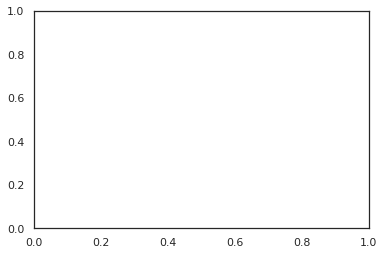

In [9]:
df.plot.scatter('Grain size (mm)', 'Spiders')
plt.ylabel('Hay arañas presentes?')
sns.despine()

Analizamos con el paquete de *scikit-learn* 

In [10]:
import sklearn.linear_model

scikit-learn has a logisitic regression classifier which uses regularization. To eliminate regularization, we set the regularization parameter `C` to $10^{12}$.

In [11]:
# C=1e12 is effectively no regularization - see https://github.com/scikit-learn/scikit-learn/issues/6738
clf = sklearn.linear_model.LogisticRegression(C=1e12, random_state=0)
clf.fit(df['Grain size (mm)'].values.reshape(-1, 1), df['Spiders'])
print(clf.intercept_, clf.coef_)

[-1.64761964] [[5.12153717]]


Esto esta de acuerdo con la ecuacion reportada en el paper:
$$
probability of spider presence = \frac{e^{-1.6476+5.1215(grain \; size)}}{(1+e^{-1.6476+5.1215(grain \; size)}}
$$

In [17]:
def plot_log_reg(x, y, data, clf, xmin=None, xmax=None, alpha=1, ax=None, constant_line=None):
    if ax is None:
        fig, ax = plt.subplots()
    else:
        fig = ax.figure
    ax.scatter(data[x], data[y], color='black', zorder=20, alpha=alpha)
    if xmin is None:
        xmin = x.min()
    if xmax is None:
        xmax = x.max()
    X_test = np.linspace(xmin, xmax, 300)
    y_test = 0.5 * 300
    # sns.lineplot(X_test,y_test)

    loss = scipy.special.expit(X_test * clf.coef_ + clf.intercept_).ravel()
    ax.plot(X_test, loss, linewidth=3)
    if constant_line is not None:
        ax.axhline(y=constant_line, color='red', linestyle='--', label='Constant Line')
    


    ax.set_xlabel(x)
    ax.set_ylabel(y)
    fig.tight_layout()
    sns.despine()
    ax.legend()
    return fig, ax

In [12]:
plot_log_reg(x='Grain size (mm)', y='Araña', data=df, clf=clf, xmin=0, xmax=1.5,constant_line=0.5);

NameError: name 'plot_log_reg' is not defined

# Evaluamos el modelo
Para probar si el *tamaño de grano* es un factor significativo, utilizamos la [*prueba de razón de verosimilitud*](https://en.wikipedia.org/wiki/Logistic_regression#Evaluating_goodness_of_fit).

Calculamos la verosimilitud del modelo con el tamaño de grano con un modelo base que predice que no hay ninguna relacion con el  tamano del grano. 



In [19]:

def log_reg_null_model(y):
    clf = sklearn.linear_model.LogisticRegression(C=1e12)
    # np.zeros_like(y) nos da un array de numpy de 0s de las mismas dimensiones que y
    # en vez de darle el tamano del grano, le estamos dando una "variable" que no varia
    # de esta manera, pongamos lo que pongamos, el modelo predicira una probabilidad segun
    # las proporciones originales de presencia/ausencia. 
    clf.fit(np.zeros_like(y).reshape(-1, 1), y)
    return clf

clf0 = log_reg_null_model(df['Spiders'])

The likelihood ratio test operates by calculating the test statistic $D$ from the likelihoods of the null and alternative models:
$$
D = -2 \log{ \frac{L(H_0)}{L(H_1)} }
$$
The test statistic is then approximately chisquare distributed.

*scikit-learn* has a log-loss function that can help us do that. 
The log-loss is defined as the negative log-likelihood, so we can rewrite:
$$
D = 2 (-\log{L(H_0)} + \log{L(H_1)}) \Rightarrow \\
D = 2 (logloss(H_0) - logloss(H_1))
$$

In [25]:
import sklearn.metrics # las metricas para evaluar modelos suelen estar aqui

X = df['Grain size (mm)'].values.reshape(-1,1)
Y = df['Spiders'].astype(np.float64) # Nuestra variable respuesta

# Tomamos nuestro modelo original, y predecimos las probabilidades
y_prob = clf.predict_proba(X)
# Ahora predecimos el costo o la perdida con la funcion log loss (que ya la tiene sklearn)

loss  = sklearn.metrics.log_loss(Y, y_prob, normalize=False)

# Tomamos nuestro segundo modelo, entrenado con 0s, y predecimos las probabilidades
y_prob0 = clf0.predict_proba(X)

# Y predecimos log loss
loss0 = sklearn.metrics.log_loss(Y, y_prob0, normalize=False)

# Hacemos una division simple, y vemos cual predice mejor, y por cuanto: 
indice = loss0/loss
indice.round(4)

1.148

In [32]:
# Ok, es un poco mejor. Podemos utilizar un metodo mas bonito para hacer un test mas formal, solo 
# para darle cierre al asunto
import scipy 

D = 2 * (loss0 - loss)
scipy.stats.distributions.chi2.sf(D, df=1).round(4)



0.0332